# Phase 2 - EDA and Preprocessing
#### Malak Gaballa and Masa Tantawy

In [1]:
## Ignoring warnings
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df1= pd.read_csv('fraudTest.csv', index_col=0)
df2= pd.read_csv('fraudTrain.csv', index_col=0)

#merging both datasets
df= pd.concat([df1,df2], ignore_index=True)

print(df1.shape)
print(df2.shape)
print(df.shape)

(555719, 22)
(1296675, 22)
(1852394, 22)


### 1. Data observation

In [3]:
df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [4]:
df.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud'],
      dtype='object')

In [5]:
# checking if columns have missing values (NaN)
df.isna().sum() # no missing values

trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [6]:
sum(df.duplicated()) #no duplicated instances

0

In [7]:
# Observing different column data types
#df.dtypes
df.dtypes.value_counts()

object     12
int64       5
float64     5
dtype: int64

In [8]:
# unique values of categorical features
df.nunique()
#unique.to_csv("Categorical Unique Values.csv")

trans_date_trans_time    1819551
cc_num                       999
merchant                     693
category                      14
amt                        60616
first                        355
last                         486
gender                         2
street                       999
city                         906
state                         51
zip                          985
lat                          983
long                         983
city_pop                     891
job                          497
dob                          984
trans_num                1852394
unix_time                1819583
merch_lat                1754157
merch_long               1809753
is_fraud                       2
dtype: int64

*Features that are have very large variance will be removed:*
 - cc_num
 - unix_time   

*The Feature that is very sparse will be removed:*
 - trans_num

#### 1.1 Statistical Distrubtions of features

In [9]:
numeric= df.columns.get_indexer(df.select_dtypes(include=np.number).columns)
categorical= df.columns.get_indexer(df.select_dtypes(include=np.object).columns)
categorical= categorical[1:10]

In [10]:
# general statistics of quantitative features in the data (statistical distributions)
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
cc_num,1852394.0,4.173860e+17,1.309115e+18,6.041621e+10,1.800429e+14,3.521417e+15,4.642255e+15,4.992346e+18
amt,1852394.0,7.006357e+01,1.592540e+02,1.000000e+00,9.640000e+00,4.745000e+01,8.310000e+01,2.894890e+04
zip,1852394.0,4.881326e+04,2.688185e+04,1.257000e+03,2.623700e+04,4.817400e+04,7.204200e+04,9.992100e+04
lat,1852394.0,3.853931e+01,5.071470e+00,2.002710e+01,3.466890e+01,3.935430e+01,4.194040e+01,6.669330e+01
long,1852394.0,-9.022783e+01,1.374789e+01,-1.656723e+02,-9.679800e+01,-8.747690e+01,-8.015800e+01,-6.795030e+01
city_pop,1852394.0,8.864367e+04,3.014876e+05,2.300000e+01,7.410000e+02,2.443000e+03,2.032800e+04,2.906700e+06
unix_time,1852394.0,1.358674e+09,1.819508e+07,1.325376e+09,1.343017e+09,1.357089e+09,1.374581e+09,1.388534e+09
merch_lat,1852394.0,3.853898e+01,5.105604e+00,1.902742e+01,3.474012e+01,3.936890e+01,4.195626e+01,6.751027e+01
merch_long,1852394.0,-9.022794e+01,1.375969e+01,-1.666716e+02,-9.689944e+01,-8.744069e+01,-8.024511e+01,-6.695090e+01
is_fraud,1852394.0,5.210015e-03,7.199217e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00


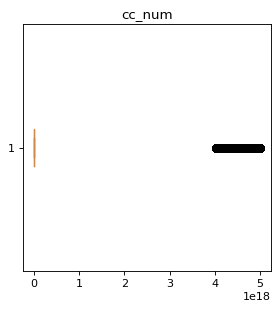

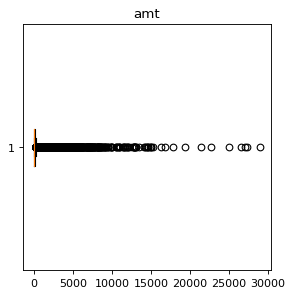

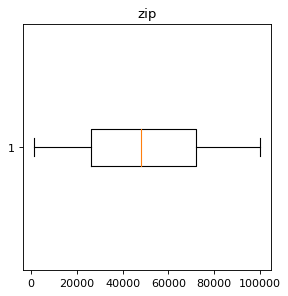

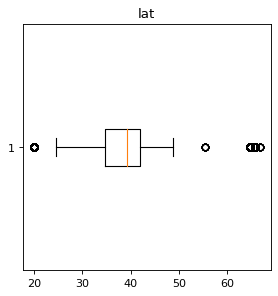

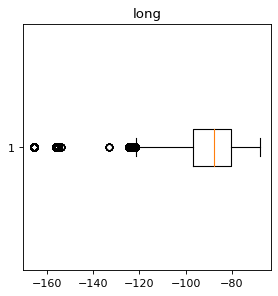

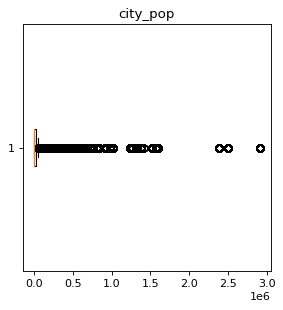

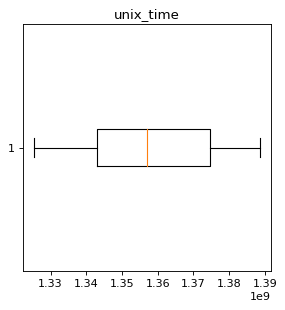

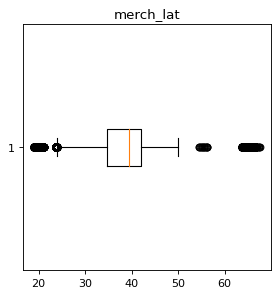

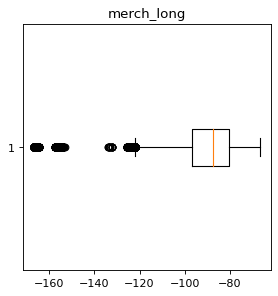

In [11]:
# checking outliers
from matplotlib.pyplot import figure

for i in range(len(numeric)-1):
    figure(figsize=(4, 4), dpi=80)
    plt.boxplot(df.iloc[:,numeric[i]],vert=False)
    plt.title(df.columns[numeric[i]])

In [12]:
# Determining the number of outliers 
for i in range(len(numeric)-1):
    Q1 = df.iloc[:,numeric[i]].quantile(0.25)
    Q3= df.iloc[:,numeric[i]].quantile(0.75)
    IQR = Q3-Q1
    print(df.columns[numeric[i]],': ',
          sum((df.iloc[:,numeric[i]] < Q1 - 1.5 * IQR) | (df.iloc[:,numeric[i]] > Q3 + 1.5 * IQR))/df.shape[0]*100,
          "%")

cc_num :  9.164950868983595 %
amt :  5.131413727317191 %
zip :  0.0 %
lat :  0.35694350122058266 %
long :  3.8342814757551578 %
city_pop :  18.68884265442449 %
unix_time :  0.0 %
merch_lat :  0.38129037343027455 %
merch_long :  3.2375401777375656 %


It is visible that the features do not follow the same distributions as they have different means and variances.   The features also contain some outliers, yet they are very large in number. According to the threshold 0.03%, none of the features have a number of outliers less than this threshold, so they will not be removed.   
Hence, normalization will be used.

In [13]:
# Normalization
for i in range(len(numeric)-1):
    df.iloc[:,numeric[i]]= (df.iloc[:,numeric[i]] - df.iloc[:,numeric[i]].mean())/ df.iloc[:,numeric[i]].std()

In [14]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
cc_num,1852394.0,2.200756e-16,1.000000,-0.318831,-0.318693,-0.316141,-0.315285,3.494696
amt,1852394.0,-1.978433e-16,1.000000,-0.433669,-0.379416,-0.141997,0.081859,181.338246
zip,1852394.0,1.069040e-16,1.000000,-1.769085,-0.839833,-0.023780,0.864105,1.901199
lat,1852394.0,-4.487679e-16,1.000000,-3.650265,-0.763173,0.160701,0.670632,5.551445
long,1852394.0,9.019614e-17,1.000000,-5.487711,-0.477904,0.200098,0.732464,1.620432
city_pop,1852394.0,-9.451430e-18,1.000000,-0.293945,-0.291563,-0.285918,-0.226595,9.347171
unix_time,1852394.0,-5.880631e-15,1.000000,-1.830066,-0.860529,-0.087105,0.874262,1.641111
merch_lat,1852394.0,-1.797024e-15,1.000000,-3.821596,-0.744056,0.162552,0.669321,5.674410
merch_long,1852394.0,-7.773865e-15,1.000000,-5.555621,-0.484858,0.202566,0.725513,1.691683
is_fraud,1852394.0,5.210015e-03,0.071992,0.000000,0.000000,0.000000,0.000000,1.000000


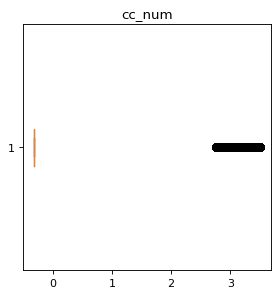

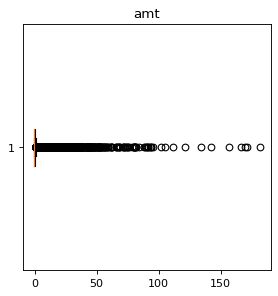

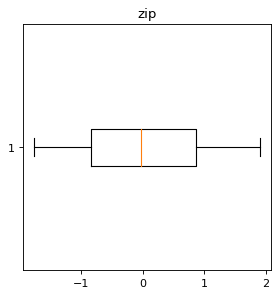

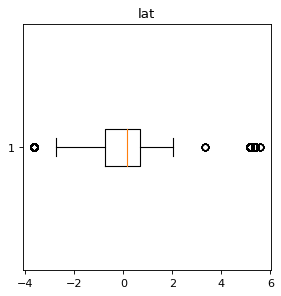

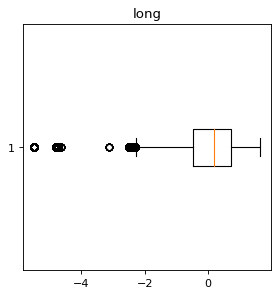

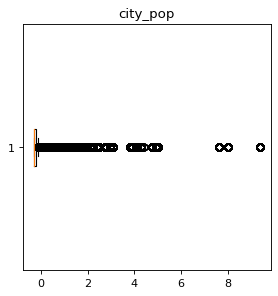

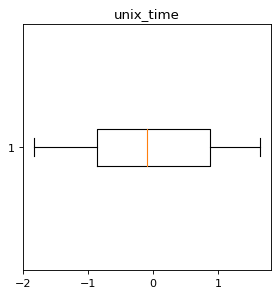

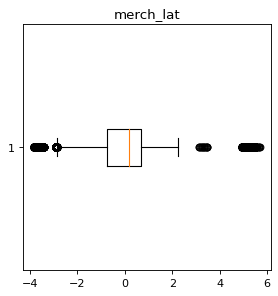

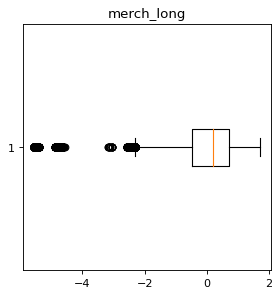

In [15]:
# checking outliers
from matplotlib.pyplot import figure

for i in range(len(numeric)-1):
    figure(figsize=(4, 4), dpi=80)
    plt.boxplot(df.iloc[:,numeric[i]],vert=False)
    plt.title(df.columns[numeric[i]])

#### 1.2 

Relationship between the features

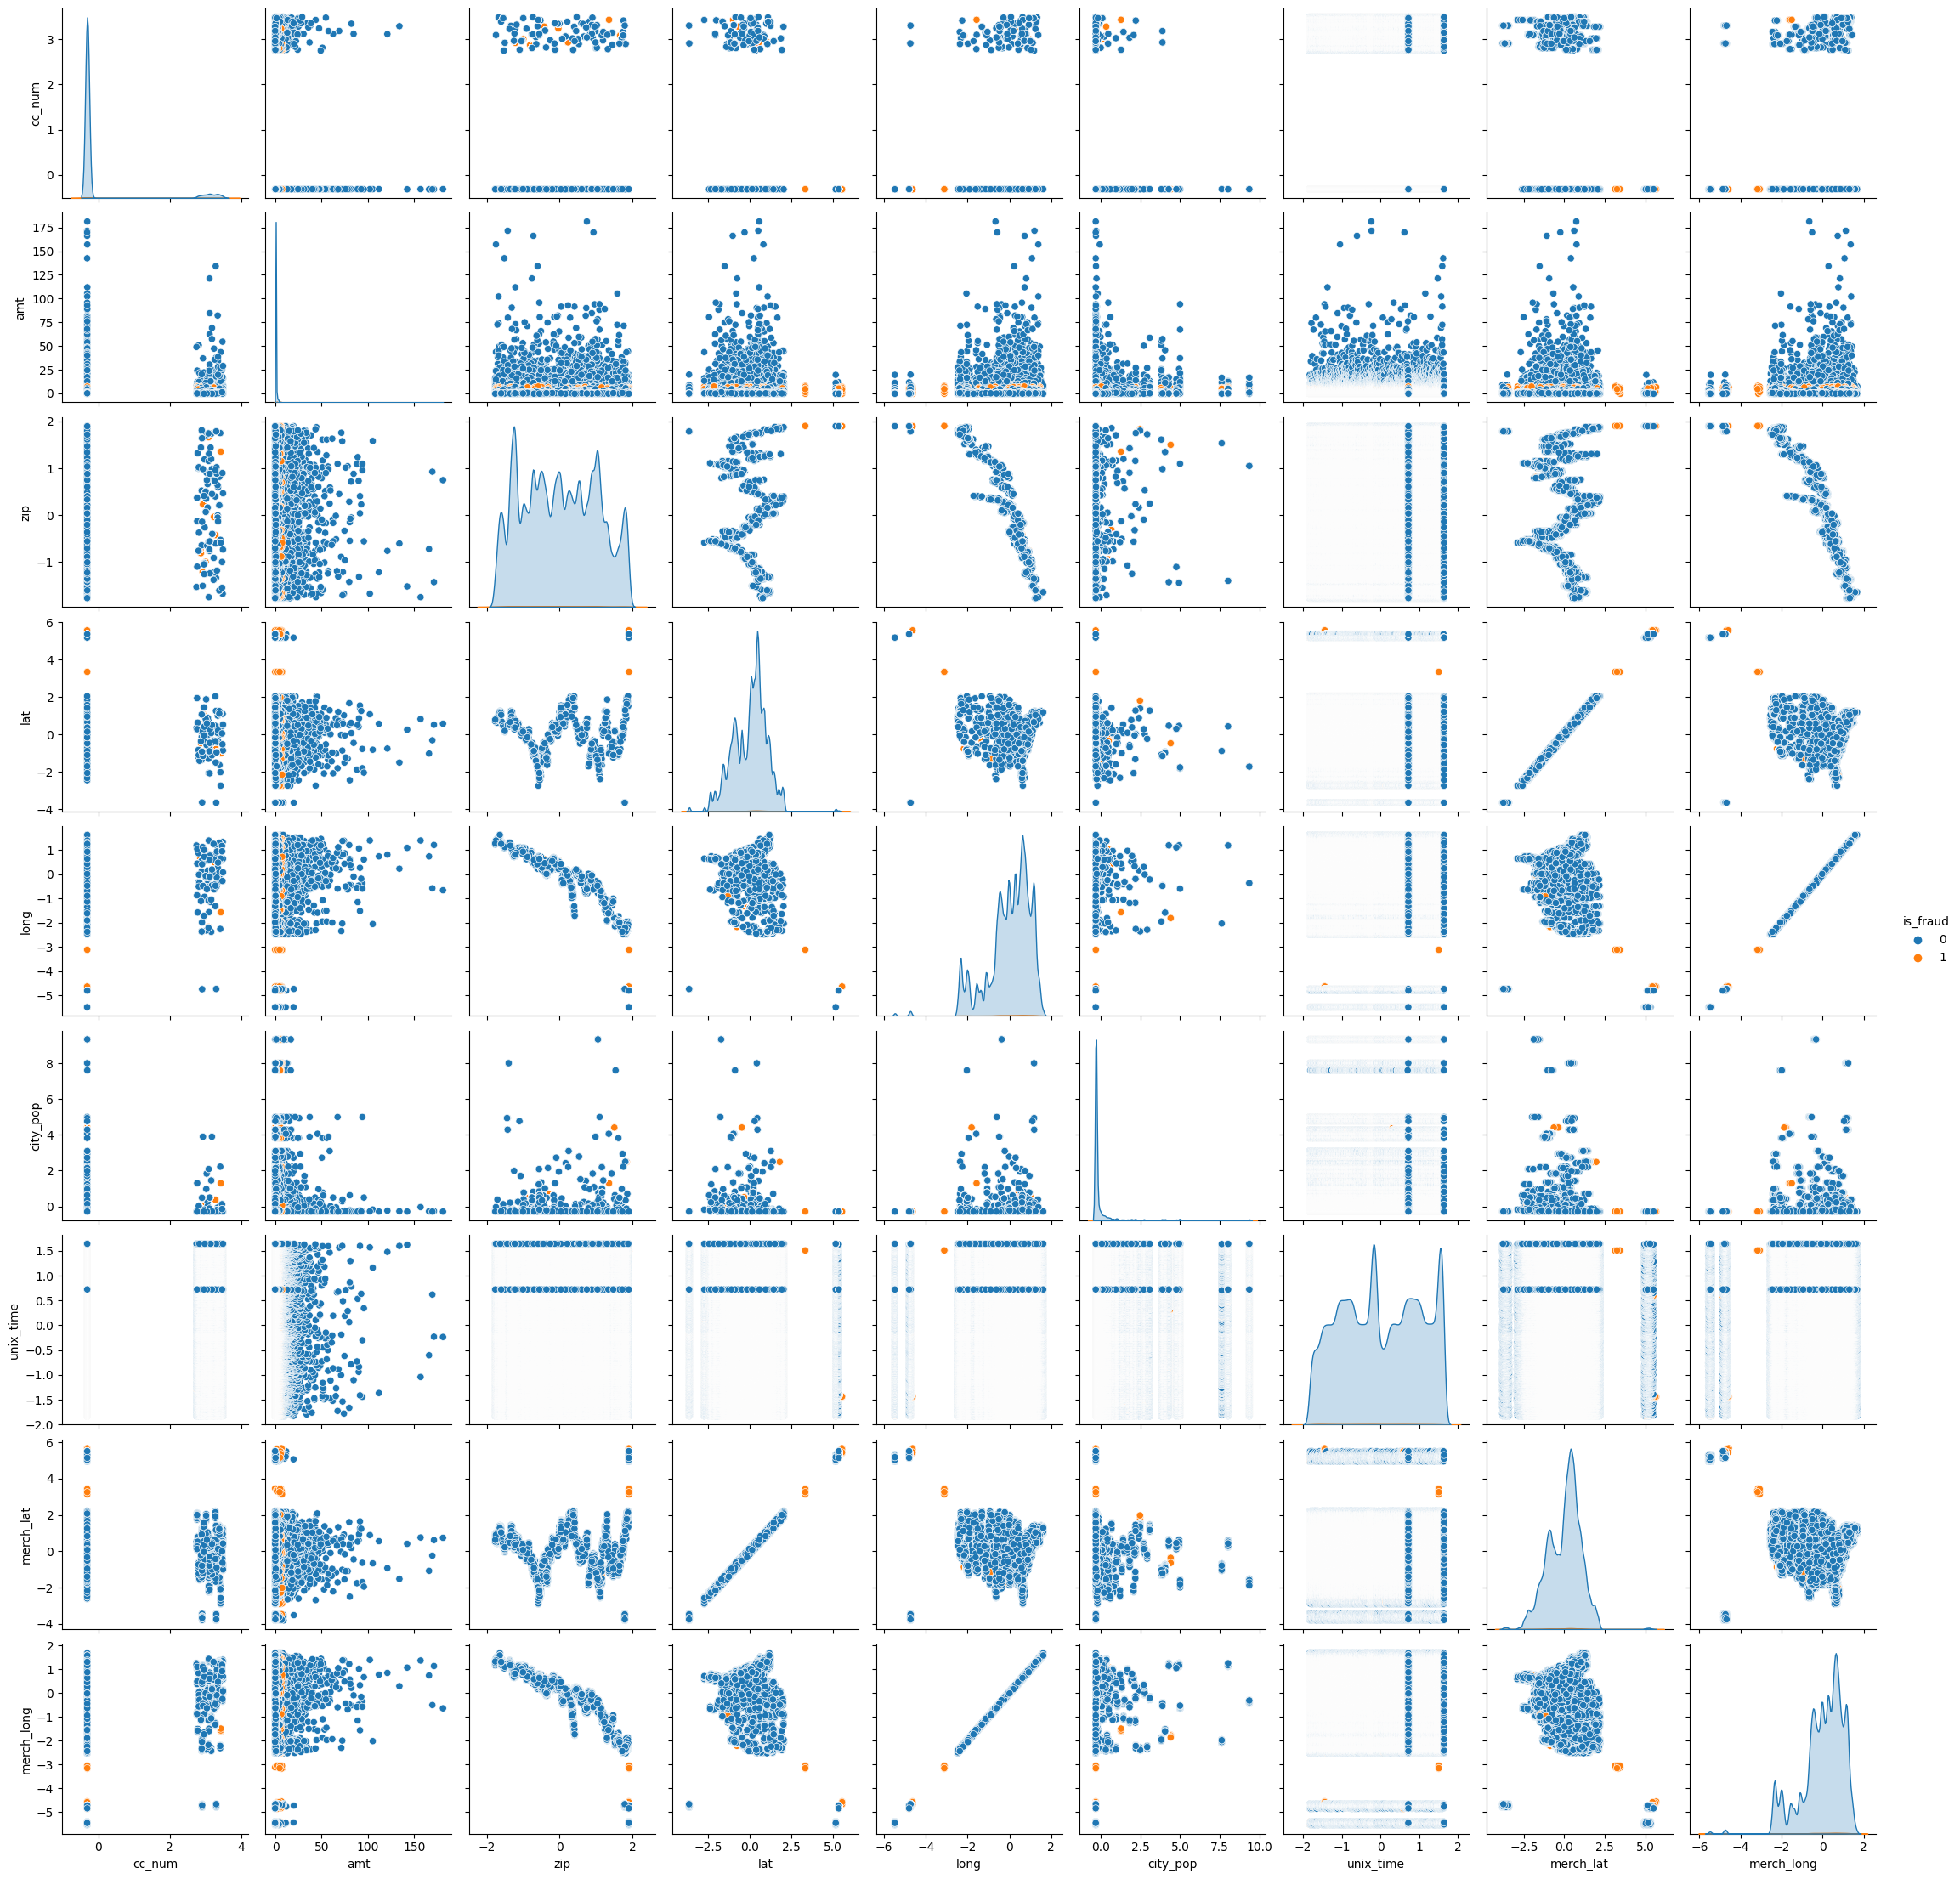

In [16]:
sns_plot= sns.pairplot(df,hue='is_fraud')
sns_plot.savefig("pairplot.png")

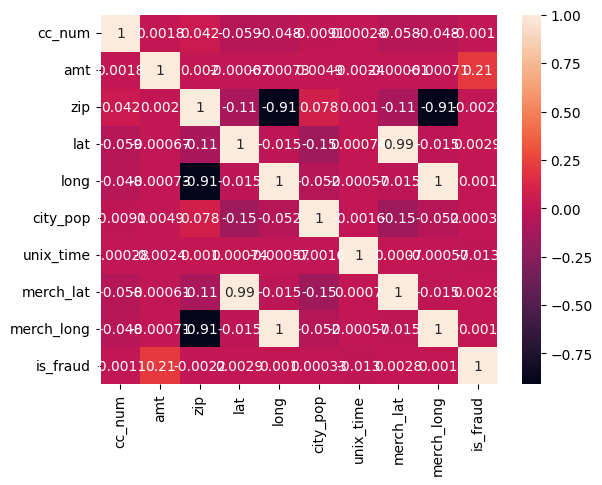

In [17]:
dataplot = sns.heatmap(df.corr(), annot=True)

In [18]:
abs(df.corr())>=0.8

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
cc_num,True,False,False,False,False,False,False,False,False,False
amt,False,True,False,False,False,False,False,False,False,False
zip,False,False,True,False,True,False,False,False,True,False
lat,False,False,False,True,False,False,False,True,False,False
long,False,False,True,False,True,False,False,False,True,False
city_pop,False,False,False,False,False,True,False,False,False,False
unix_time,False,False,False,False,False,False,True,False,False,False
merch_lat,False,False,False,True,False,False,False,True,False,False
merch_long,False,False,True,False,True,False,False,False,True,False
is_fraud,False,False,False,False,False,False,False,False,False,True


*It is visible that there is high collinearity in the dataset between:*
- zip, long and merch_long
- lat and merch_lat
- long and merch_long   
merch_lat, merch_long, and zip will be removed due to solve the collinearity issue.    
merch_lat and merch_long were already previously seen to containn a lot of outliers.

In [19]:
df.columns[categorical]

Index(['merchant', 'category', 'first', 'last', 'gender', 'street', 'city',
       'state', 'job'],
      dtype='object')

In [20]:
# using the chi square test of independence to check collinearity between categorical data
from scipy.stats import chi2_contingency
alpha = 0.05

for i in range(len(categorical)):
    for j in range(len(categorical)):
        if i!=j:
            data = pd.crosstab(df.iloc[:, categorical[i]], df.iloc[:, categorical[j]])
            stat, p, dof, expected = chi2_contingency(data)
            print(df.columns[categorical[i]], "and",df.columns[categorical[j]])
            print("p value is " + str(p))
            if p <= alpha:
                print('Dependent (reject H0)\n')
            else:
                print('Independent (H0 holds true)\n')

merchant and category
p value is 0.0
Dependent (reject H0)

merchant and first
p value is 0.0
Dependent (reject H0)

merchant and last
p value is 0.0
Dependent (reject H0)

merchant and gender
p value is 0.0
Dependent (reject H0)

merchant and street
p value is 0.0
Dependent (reject H0)

merchant and city
p value is 0.0
Dependent (reject H0)

merchant and state
p value is 1.0972427985183626e-217
Dependent (reject H0)

merchant and job
p value is 0.0
Dependent (reject H0)

category and merchant
p value is 0.0
Dependent (reject H0)

category and first
p value is 0.0
Dependent (reject H0)

category and last
p value is 0.0
Dependent (reject H0)

category and gender
p value is 0.0
Dependent (reject H0)

category and street
p value is 0.0
Dependent (reject H0)

category and city
p value is 0.0
Dependent (reject H0)

category and state
p value is 0.0
Dependent (reject H0)

category and job
p value is 0.0
Dependent (reject H0)

first and merchant
p value is 0.0
Dependent (reject H0)

first and

#### 1.3 Correlation with the label

In [21]:
# with numeric features
df.corr()[-1:]

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
is_fraud,-0.001125,0.209308,-0.00219,0.002904,0.001022,0.000325,-0.013329,0.002778,0.000999,1.0


In [22]:
df.columns[categorical]

Index(['merchant', 'category', 'first', 'last', 'gender', 'street', 'city',
       'state', 'job'],
      dtype='object')

In [23]:
# with categorical features using the chi square test of indepence
from scipy.stats import chi2_contingency
alpha = 0.05

for i in range(len(categorical)):
    data = pd.crosstab(df.iloc[:, categorical[i]], df.is_fraud)
    stat, p, dof, expected = chi2_contingency(data)
    print(df.columns[categorical[i]], "and Label")
    print("p value is " + str(p))
    if p <= alpha:
        print('Dependent (reject H0)\n')
    else:
        print('Independent (H0 holds true)\n')

merchant and Label
p value is 0.0
Dependent (reject H0)

category and Label
p value is 0.0
Dependent (reject H0)

first and Label
p value is 0.0
Dependent (reject H0)

last and Label
p value is 0.0
Dependent (reject H0)

gender and Label
p value is 1.97369744724312e-15
Dependent (reject H0)

street and Label
p value is 0.0
Dependent (reject H0)

city and Label
p value is 0.0
Dependent (reject H0)

state and Label
p value is 0.0
Dependent (reject H0)

job and Label
p value is 0.0
Dependent (reject H0)



### 2. Data Preparation

In [24]:
## first dropping the unrequired features based on the previous section
df.drop(columns= ['trans_num', 'cc_num','unix_time', 'merch_lat', 'merch_long', 'zip'], inplace= True)

#### 2.1 Dealing with date time features

In [25]:
# converting transaction time to datetime
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])

#split transaction date and time feature into multiple features 
df['trans_day'] = df['trans_date_trans_time'].dt.day # Day of the month
df['trans_month'] = df['trans_date_trans_time'].dt.month # Month
df['trans_year'] = df['trans_date_trans_time'].dt.year # Year
df['trans_hour'] = df['trans_date_trans_time'].dt.hour # Hour of the day
df['trans_minute'] = df['trans_date_trans_time'].dt.minute # Minute

In [26]:
# converting dob feature into age
from datetime import datetime
import math
df['dob'] = pd.to_datetime(df['dob'])
df['age']=((df.trans_date_trans_time - df.dob)/ np.timedelta64(1, 'Y')).apply(np.floor)
#df.head()

Text(0.5, 1.0, 'age')

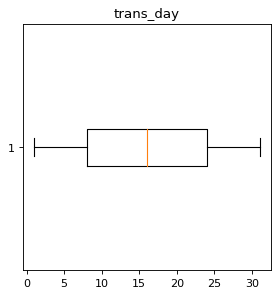

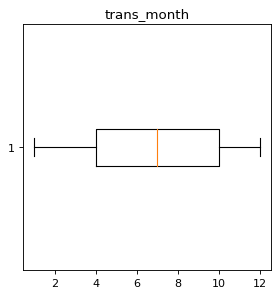

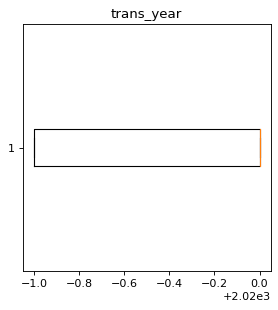

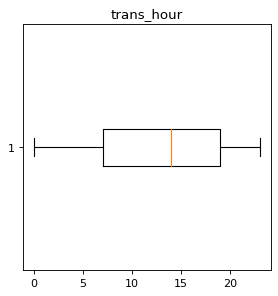

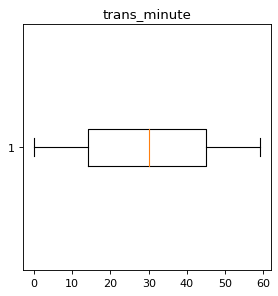

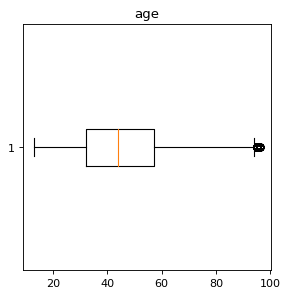

In [27]:
#checking for outliers in the new columns
from matplotlib.pyplot import figure

figure(figsize=(4, 4), dpi=80)
plt.boxplot(df.loc[:,'trans_day'],vert=False)
plt.title('trans_day')


figure(figsize=(4, 4), dpi=80)
plt.boxplot(df.loc[:,'trans_month'],vert=False)
plt.title('trans_month')


figure(figsize=(4, 4), dpi=80)
plt.boxplot(df.loc[:,'trans_year'],vert=False)
plt.title('trans_year')


figure(figsize=(4, 4), dpi=80)
plt.boxplot(df.loc[:,'trans_hour'],vert=False)
plt.title('trans_hour')


figure(figsize=(4, 4), dpi=80)
plt.boxplot(df.loc[:,'trans_minute'],vert=False)
plt.title('trans_minute')

figure(figsize=(4, 4), dpi=80)
plt.boxplot(df.loc[:,'age'],vert=False)
plt.title('age')

In [28]:
# Determining the outliers in age
Q1 = df.loc[:,'age'].quantile(0.25)
Q3= df.loc[:,'age'].quantile(0.75)
IQR = Q3-Q1
print('Percentage of outliers: ',
     sum((df.age < Q1 - 1.5 * IQR) | (df.age > Q3 + 1.5 * IQR))/ df.shape[0]*100, '%')

Percentage of outliers:  0.02348312508030149 %


Since the percenatge of outliers is less than 0.03%, they will be removed.

In [29]:
df= df[(df.age < Q1 - 1.5 * IQR) | (df.age > Q3 + 1.5 * IQR)== False]

Text(0.5, 1.0, 'Age after removing outliers')

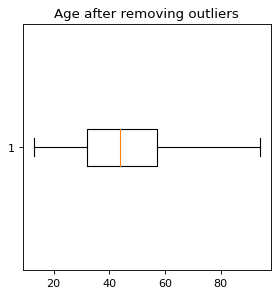

In [30]:
figure(figsize=(4, 4), dpi=80)
plt.boxplot(df.age,vert=False)
plt.title('Age after removing outliers')

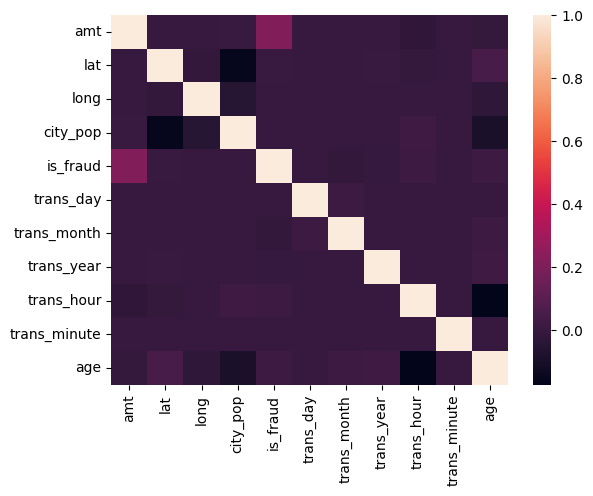

In [31]:
dataplot = sns.heatmap(df.corr())

In [32]:
df.corr()

,amt,lat,long,city_pop,is_fraud,trans_day,trans_month,trans_year,trans_hour,trans_minute,age
amt,1.000000,-0.000672,-0.000746,0.004924,0.209266,0.000089,-0.002599,-0.001276,-0.024906,0.000462,-0.010781
lat,-0.000672,1.000000,-0.014776,-0.154809,0.002900,-0.000769,-0.000411,0.001123,-0.011248,-0.000405,0.047286
long,-0.000746,-0.014776,1.000000,-0.052305,0.000987,0.000101,-0.001251,-0.000115,-0.001992,-0.000623,-0.029761
city_pop,0.004924,-0.154809,-0.052305,1.000000,0.000335,0.000657,-0.000492,-0.001626,0.019928,-0.000379,-0.092127
is_fraud,0.209266,0.002900,0.000987,0.000335,1.000000,-0.000055,-0.016434,-0.006068,0.013191,0.000217,0.010551
trans_day,0.000089,-0.000769,0.000101,0.000657,-0.000055,1.000000,0.010795,0.000743,-0.000164,-0.000030,0.000986
trans_month,-0.002599,-0.000411,-0.001251,-0.000492,-0.016434,0.010795,1.000000,0.000800,-0.000959,0.000021,0.016459
trans_year,-0.001276,0.001123,-0.000115,-0.001626,-0.006068,0.000743,0.000800,1.000000,-0.000299,0.000013,0.023819
trans_hour,-0.024906,-0.011248,-0.001992,0.019928,0.013191,-0.000164,-0.000959,-0.000299,1.000000,-0.000635,-0.173050
trans_minute,0.000462,-0.000405,-0.000623,-0.000379,0.000217,-0.000030,0.000021,0.000013,-0.000635,1.000000,-0.000954


In [33]:
abs(df.corr())>=0.8 #no collinearity

,amt,lat,long,city_pop,is_fraud,trans_day,trans_month,trans_year,trans_hour,trans_minute,age
amt,True,False,False,False,False,False,False,False,False,False,False
lat,False,True,False,False,False,False,False,False,False,False,False
long,False,False,True,False,False,False,False,False,False,False,False
city_pop,False,False,False,True,False,False,False,False,False,False,False
is_fraud,False,False,False,False,True,False,False,False,False,False,False
trans_day,False,False,False,False,False,True,False,False,False,False,False
trans_month,False,False,False,False,False,False,True,False,False,False,False
trans_year,False,False,False,False,False,False,False,True,False,False,False
trans_hour,False,False,False,False,False,False,False,False,True,False,False
trans_minute,False,False,False,False,False,False,False,False,False,True,False


In [34]:
# correlation with label
df.corr().loc[:,'is_fraud']

amt             0.209266
lat             0.002900
long            0.000987
city_pop        0.000335
is_fraud        1.000000
trans_day      -0.000055
trans_month    -0.016434
trans_year     -0.006068
trans_hour      0.013191
trans_minute    0.000217
age             0.010551
Name: is_fraud, dtype: float64

In [35]:
# Dropping the old features
df.drop(columns= ['trans_date_trans_time', 'dob'], inplace= True)

In [36]:
# normalize the new columns so that all the numeric features in the dataset are normalized
df.loc[:,'trans_day']= (df.loc[:,'trans_day'] - df.loc[:,'trans_day'].mean())/ df.loc[:,'trans_day'].std()
df.loc[:,'trans_month']= (df.loc[:,'trans_month'] - df.loc[:,'trans_month'].mean())/ df.loc[:,'trans_month'].std()
df.loc[:,'trans_year']= (df.loc[:,'trans_year'] - df.loc[:,'trans_year'].mean())/ df.loc[:,'trans_year'].std()
df.loc[:,'trans_hour']= (df.loc[:,'trans_hour'] - df.loc[:,'trans_hour'].mean())/ df.loc[:,'trans_hour'].std()
df.loc[:,'trans_minute']= (df.loc[:,'trans_minute'] - df.loc[:,'trans_minute'].mean())/ df.loc[:,'trans_minute'].std()
df.loc[:,'age']= (df.loc[:,'age'] - df.loc[:,'age'].mean())/ df.loc[:,'age'].std()

In [37]:
df.columns

Index(['merchant', 'category', 'amt', 'first', 'last', 'gender', 'street',
       'city', 'state', 'lat', 'long', 'city_pop', 'job', 'is_fraud',
       'trans_day', 'trans_month', 'trans_year', 'trans_hour', 'trans_minute',
       'age'],
      dtype='object')

#### 2.2 Dealing with categorical variables: Encoding

In [38]:
categorical= categorical[:-1] #removing dob
df.columns[categorical]

Index(['amt', 'first', 'gender', 'street', 'city', 'state', 'lat', 'long'], dtype='object')

In [39]:
df.iloc[:,categorical].nunique()

amt       60606
first       355
gender        2
street      999
city        906
state        51
lat         983
long        983
dtype: int64

#### 2.2.1 Label Encoding

In [40]:
# Label encoding on gender: 1 for F and 0 for M
df.gender=df['gender'].replace(['F','M'],[1,0])

*Label encoding cannot be used on the rest of the categorical features as they are not ordinal.*

#### 2.2.2 Frequency Encoding

In [41]:
# merchant 
sum(df.merchant.value_counts().duplicated()) # collisions will arise

133

In [42]:
# category
sum(df.category.value_counts().duplicated()) # no 2 classes have the same frequencies

0

In [43]:
# using frequency encoding for category
from category_encoders import CountEncoder
df= CountEncoder(cols=['category']).fit(df).transform(df)
df.category

0          130058
1          130058
2          122530
3          114203
4           57941
            ...  
1852389    134082
1852390    130690
1852391    130690
1852392    130690
1852393    130690
Name: category, Length: 1851959, dtype: int64

In [44]:
# first
fnames, counts = np.unique(df.loc[:,'first'], return_counts=True)
sum(pd.Series(counts).duplicated()) # collisions will arise

114

In [45]:
# last
fnames, counts = np.unique(df.loc[:,'last'], return_counts=True)
sum(pd.Series(counts).duplicated()) # collisions will arise

240

In [46]:
# street 
sum(df.street.value_counts().duplicated()) # collisions will arise

858

In [47]:
# city 
sum(df.job.value_counts().duplicated()) # collisions will arise

223

In [48]:
# state 
sum(df.state.value_counts().duplicated()) # no 2 classes have the same frequencies

0

In [49]:
# using frequency encoding for state
df= CountEncoder(cols=['state']).fit(df).transform(df)
df.state

0           41731
1           15357
2          119419
3           60775
4           65825
            ...  
1852389     15357
1852390     36910
1852391     23427
1852392     17574
1852393     16806
Name: state, Length: 1851959, dtype: int64

In [50]:
# job 
sum(df.job.value_counts().duplicated())  # collisions will arise

223

*Frequency encoding cannot be used on merchant, first, last, street, city and  job as it will lead to collisions.*   
*One-hot encoding, binary encoding, and hashing are also not suitable for these features as each has over 350 classes, so it will cause a problem of curse of dimensionality.*

#### 2.2.3 Target Encoding

In [51]:
# merchant
merch, counts = np.unique(df.loc[:,'merchant'], return_counts=True)
means=[]
for i in range(len(merch)):
    m=df[df.merchant== merch[i]].is_fraud.mean()
    means.append(m)
sum(pd.Series(means).duplicated())

33

In [52]:
# first
firstname, counts = np.unique(df.loc[:,'first'], return_counts=True)
means=[]
for i in range(len(firstname)):
    m=df[df['first'] == firstname[1]].is_fraud.mean()
    means.append(m)
sum(pd.Series(means).duplicated())

354

In [53]:
# last
lastname, counts = np.unique(df.loc[:,'last'], return_counts=True)
means=[]
for i in range(len(lastname)):
    m=df[df['last'] == lastname[1]].is_fraud.mean()
    means.append(m)
sum(pd.Series(means).duplicated())

485

In [54]:
# street
streets, counts = np.unique(df.loc[:,'street'], return_counts=True)
means=[]
for i in range(len(streets)):
    m=df[df.street== streets[i]].is_fraud.mean()
    means.append(m)
sum(pd.Series(means).duplicated())

583

In [55]:
# city
cities, counts = np.unique(df.loc[:,'city'], return_counts=True)
means=[]
for i in range(len(cities)):
    m=df[df.city== cities[i]].is_fraud.mean()
    means.append(m)
sum(pd.Series(means).duplicated())

478

In [56]:
# job
jobs, counts = np.unique(df.loc[:,'job'], return_counts=True)
means=[]
for i in range(len(jobs)):
    m=df[df.job== jobs[i]].is_fraud.mean()
    means.append(m)
sum(pd.Series(means).duplicated())

97

*Target encoding also fails on merchant, first, last, street, city and  job as it will lead to collisions.*     

#### 2.2.4 Leave-One-Out Target Encoding

In [57]:
# merchant
merch, counts = np.unique(df.loc[:,'merchant'], return_counts=True)
means=[]
for i in range(len(merch)):
    m=df[df.merchant!= merch[i]].is_fraud.mean()
    means.append(m)
sum(pd.Series(means).duplicated())

15

In [58]:
# first
firstname, counts = np.unique(df.loc[:,'first'], return_counts=True)
means=[]
for i in range(len(firstname)):
    m=df[df['first']!= firstname[i]].is_fraud.mean()
    means.append(m)
sum(pd.Series(means).duplicated())

31

In [59]:
# last
lastname, counts = np.unique(df.loc[:,'last'], return_counts=True)
means=[]
for i in range(len(lastname)):
    m=df[df['last']!= lastname[i]].is_fraud.mean()
    means.append(m)
sum(pd.Series(means).duplicated())

80

In [60]:
# street
streets, counts = np.unique(df.loc[:,'street'], return_counts=True)
means=[]
for i in range(len(streets)):
    m=df[df.street!= streets[i]].is_fraud.mean()
    means.append(m)
sum(pd.Series(means).duplicated())

516

In [61]:
# city
cities, counts = np.unique(df.loc[:,'city'], return_counts=True)
means=[]
for i in range(len(cities)):
    m=df[df.city!= cities[i]].is_fraud.mean()
    means.append(m)
sum(pd.Series(means).duplicated())

405

In [62]:
# job
jobs, counts = np.unique(df.loc[:,'job'], return_counts=True)
means=[]
for i in range(len(jobs)):
    m=df[df.job!= jobs[i]].is_fraud.mean()
    means.append(m)
sum(pd.Series(means).duplicated())

58

*Leave-One-Out encoding also fails on merchant, first, last, street, city and  job as it will lead to collisions.Therefore, after trying all feature encoding approaches, these features will be dropped due to their sparsity.* 

In [63]:
df.drop(columns= ['merchant', 'first','last','street','city','job'], inplace= True)

### 3. Prepared Dataset (Post-Cleaning)

In [64]:
df.shape

(1851959, 14)

In [65]:
#shift label to first column in dataset
first_column = df.pop('is_fraud')  
df.insert(0, 'is_fraud', first_column)

In [66]:
df.columns

Index(['is_fraud', 'category', 'amt', 'gender', 'state', 'lat', 'long',
       'city_pop', 'trans_day', 'trans_month', 'trans_year', 'trans_hour',
       'trans_minute', 'age'],
      dtype='object')

In [67]:
df.head()

,is_fraud,category,amt,gender,state,lat,long,city_pop,trans_day,trans_month,trans_year,trans_hour,trans_minute,age
0,0,130058,-0.421990,0,41731,-0.901792,0.675909,0.812151,0.580129,-0.336314,0.998675,-0.118366,-0.894424,0.358982
1,0,130058,-0.252575,1,15357,0.351257,-1.469910,-0.293019,0.580129,-0.336314,0.998675,-0.118366,-0.894424,-0.905514
2,0,122530,-0.180740,1,119419,0.420704,1.214101,-0.179602,0.580129,-0.336314,0.998675,-0.118366,-0.894424,0.186550
3,0,114203,-0.062878,0,60775,-1.965823,0.684376,-0.112365,0.580129,-0.336314,0.998675,-0.118366,-0.836709,-0.790560
4,0,57941,-0.419918,0,65825,1.126614,0.379028,-0.290286,0.580129,-0.336314,0.998675,-0.118366,-0.836709,1.048706


In [68]:
df.dtypes

is_fraud          int64
category          int64
amt             float64
gender            int64
state             int64
lat             float64
long            float64
city_pop        float64
trans_day       float64
trans_month     float64
trans_year      float64
trans_hour      float64
trans_minute    float64
age             float64
dtype: object

In [69]:
np.sum(df.corr()>=0.8) #no collinearity

is_fraud        1
category        1
amt             1
gender          1
state           1
lat             1
long            1
city_pop        1
trans_day       1
trans_month     1
trans_year      1
trans_hour      1
trans_minute    1
age             1
dtype: int64

In [70]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
is_fraud,1851959.0,5.207459e-03,0.071975,0.000000,0.000000,0.000000,0.000000,1.000000
category,1851959.0,1.437318e+05,34220.856220,57941.000000,130058.000000,139301.000000,175407.000000,187989.000000
amt,1851959.0,-1.092757e-05,1.000017,-0.433669,-0.379416,-0.141997,0.081797,181.338246
gender,1851959.0,5.479328e-01,0.497697,0.000000,0.000000,1.000000,1.000000,1.000000
state,1851959.0,5.854849e+04,36384.378637,9.000000,34425.000000,43134.000000,66627.000000,135269.000000
lat,1851959.0,-3.102608e-05,1.000115,-3.650265,-0.763173,0.164112,0.670632,5.551445
long,1851959.0,-2.316716e-04,1.000003,-5.487711,-0.477904,0.200098,0.732107,1.620432
city_pop,1851959.0,6.143889e-05,1.000109,-0.293945,-0.291563,-0.285918,-0.226595,9.347171
trans_day,1851959.0,4.496623e-17,1.000000,-1.673078,-0.884455,0.016827,0.918110,1.706733
trans_month,1851959.0,-3.064456e-16,1.000000,-1.796215,-0.920274,-0.044333,0.831608,1.415569


In [71]:
df.to_csv("Prepared Transactions Data.csv")